<a href="https://colab.research.google.com/github/ProductPriceTrackerOrg/data-science/blob/main/notebooks/price-forecasing/02_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy

In [2]:
!git clone "https://github.com/ProductPriceTrackerOrg/data-science.git"

Cloning into 'data-science'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 84 (delta 13), reused 64 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 5.75 MiB | 6.93 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [16]:
camera = pd.read_csv('/content/data-science/data/raw/price-forecasting/category/cameras.csv')
laptop = pd.read_csv('/content/data-science/data/raw/price-forecasting/category/laptops.csv')
mobile = pd.read_csv('/content/data-science/data/raw/price-forecasting/category/mobile-phones.csv')
network_components = pd.read_csv('/content/data-science/data/raw/price-forecasting/category/network-components.csv')
perpherials = pd.read_csv('/content/data-science/data/raw/price-forecasting/category/perpherals.csv')
smart_watches = pd.read_csv('/content/data-science/data/raw/price-forecasting/category/smart-watches.csv')
storage = pd.read_csv('/content/data-science/data/raw/price-forecasting/category/storage.csv')
tablets = pd.read_csv('/content/data-science/data/raw/price-forecasting/category/tablets.csv')
television = pd.read_csv('/content/data-science/data/raw/price-forecasting/category/television.csv')

### **Camera Dataset**

In [17]:
camera.head()

,title,brand,date,price
0,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-01,2999
1,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-02,2756
2,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-03,2967
3,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-04,2710
4,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-05,3122


In [18]:
camera.isnull().sum()

,0
title,0
brand,0
date,0
price,0


In [19]:
camera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15090 entries, 0 to 15089
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   15090 non-null  object
 1   brand   15090 non-null  object
 2   date    15090 non-null  object
 3   price   15090 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 471.7+ KB


In [20]:
# convert date into pd datetime
camera['date'] = pd.to_datetime(camera['date'])

In [21]:
camera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15090 entries, 0 to 15089
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   15090 non-null  object        
 1   brand   15090 non-null  object        
 2   date    15090 non-null  datetime64[ns]
 3   price   15090 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 471.7+ KB


In [22]:
# add column to indicate category
camera['category'] = 'camera'

# price column multiplied by 3.4
camera['price'] = camera['price'] * 3.4
camera.head()

,title,brand,date,price,category
0,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-01,10196.6,camera
1,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-02,9370.4,camera
2,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-03,10087.8,camera
3,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-04,9214.0,camera
4,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-05,10614.8,camera


### **Laptops and other products**

In [23]:
# do same thing for laptops
print(laptop.isnull().sum())

laptop['date'] = pd.to_datetime(laptop['date'])
laptop['category'] = 'laptop'
laptop['price'] = laptop['price'] * 3.4
print(laptop.info())
laptop.head()

title    0
brand    0
date     0
price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118708 entries, 0 to 118707
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   title     118708 non-null  object        
 1   brand     118708 non-null  object        
 2   date      118708 non-null  datetime64[ns]
 3   price     118708 non-null  float64       
 4   category  118708 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.5+ MB
None


,title,brand,date,price,category
0,Lenovo Intel Core i7 12th Gen 1255U - (16 GB/5...,LENOVO,2022-11-01,140454.0,laptop
1,Lenovo Intel Core i7 12th Gen 1255U - (16 GB/5...,LENOVO,2022-11-02,143857.4,laptop
2,Lenovo Intel Core i7 12th Gen 1255U - (16 GB/5...,LENOVO,2022-11-03,154608.2,laptop
3,Lenovo Intel Core i7 12th Gen 1255U - (16 GB/5...,LENOVO,2022-11-04,139335.4,laptop
4,Lenovo Intel Core i7 12th Gen 1255U - (16 GB/5...,LENOVO,2022-11-05,139831.8,laptop


In [24]:
# mobile-phones

print(mobile.isnull().sum())

mobile['date'] = pd.to_datetime(mobile['date'])
mobile['category'] = 'mobile'
mobile['price'] = mobile['price'] * 3.4
print(mobile.info())
mobile.head()

title    0
brand    0
date     0
price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146876 entries, 0 to 146875
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   title     146876 non-null  object        
 1   brand     146876 non-null  object        
 2   date      146876 non-null  datetime64[ns]
 3   price     146876 non-null  float64       
 4   category  146876 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 5.6+ MB
None


,title,brand,date,price,category
0,Nokia 105 Single SIM Keypad Mobile Phone with ...,NOKIA,2022-11-01,9615.2,mobile
1,Nokia 105 Single SIM Keypad Mobile Phone with ...,NOKIA,2022-11-02,10390.4,mobile
2,Nokia 105 Single SIM Keypad Mobile Phone with ...,NOKIA,2022-11-03,9424.8,mobile
3,Nokia 105 Single SIM Keypad Mobile Phone with ...,NOKIA,2022-11-04,10448.2,mobile
4,Nokia 105 Single SIM Keypad Mobile Phone with ...,NOKIA,2022-11-05,9295.6,mobile


In [25]:
# network-components

print(network_components.isnull().sum())

network_components['date'] = pd.to_datetime(network_components['date'])
network_components['category'] = 'network-components'
network_components['price'] = network_components['price'] * 3.4
print(network_components.info())
network_components.head()

title    0
brand    0
date     0
price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13078 entries, 0 to 13077
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     13078 non-null  object        
 1   brand     13078 non-null  object        
 2   date      13078 non-null  datetime64[ns]
 3   price     13078 non-null  float64       
 4   category  13078 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 511.0+ KB
None


,title,brand,date,price,category
0,TENDA AC10 AC1200 Gigabit 1200 Mbps Wireless R...,TENDA,2022-11-01,10145.6,network-components
1,TENDA AC10 AC1200 Gigabit 1200 Mbps Wireless R...,TENDA,2022-11-02,10461.8,network-components
2,TENDA AC10 AC1200 Gigabit 1200 Mbps Wireless R...,TENDA,2022-11-03,10077.6,network-components
3,TENDA AC10 AC1200 Gigabit 1200 Mbps Wireless R...,TENDA,2022-11-04,9265.0,network-components
4,TENDA AC10 AC1200 Gigabit 1200 Mbps Wireless R...,TENDA,2022-11-05,9193.6,network-components


In [26]:
# perpherals

print(perpherials.isnull().sum())

perpherials['date'] = pd.to_datetime(perpherials['date'])
perpherials['category'] = 'perpherials'
perpherials['price'] = perpherials['price'] * 3.4
print(perpherials.info())

title    0
brand    0
date     0
price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73438 entries, 0 to 73437
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     73438 non-null  object        
 1   brand     73438 non-null  object        
 2   date      73438 non-null  datetime64[ns]
 3   price     73438 non-null  float64       
 4   category  73438 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.8+ MB
None


In [27]:
# smart-watches

print(smart_watches.isnull().sum())

smart_watches['date'] = pd.to_datetime(smart_watches['date'])
smart_watches['category'] = 'smart-watches'
smart_watches['price'] = smart_watches['price'] * 3.4
print(smart_watches.info())
smart_watches.head()

title    0
brand    0
date     0
price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161966 entries, 0 to 161965
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   title     161966 non-null  object        
 1   brand     161966 non-null  object        
 2   date      161966 non-null  datetime64[ns]
 3   price     161966 non-null  float64       
 4   category  161966 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 6.2+ MB
None


,title,brand,date,price,category
0,Boult Drift Bluetooth Calling 1.85 HD 500Nits ...,BOULT,2022-11-01,9598.2,smart-watches
1,Boult Drift Bluetooth Calling 1.85 HD 500Nits ...,BOULT,2022-11-02,11005.8,smart-watches
2,Boult Drift Bluetooth Calling 1.85 HD 500Nits ...,BOULT,2022-11-03,11101.0,smart-watches
3,Boult Drift Bluetooth Calling 1.85 HD 500Nits ...,BOULT,2022-11-04,10920.8,smart-watches
4,Boult Drift Bluetooth Calling 1.85 HD 500Nits ...,BOULT,2022-11-05,9914.4,smart-watches


In [28]:
# storage devices

print(storage.isnull().sum())

storage['date'] = pd.to_datetime(storage['date'])
storage['category'] = 'storage'
storage['price'] = storage['price'] * 3.4
print(storage.info())
storage.head()

title    0
brand    0
date     0
price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267596 entries, 0 to 267595
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   title     267596 non-null  object        
 1   brand     267596 non-null  object        
 2   date      267596 non-null  datetime64[ns]
 3   price     267596 non-null  float64       
 4   category  267596 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 10.2+ MB
None


,title,brand,date,price,category
0,SanDisk SDCZ48-128G-I35 128 GB Pen Drive(Black),SANDISK,2022-11-01,9299.0,storage
1,SanDisk SDCZ48-128G-I35 128 GB Pen Drive(Black),SANDISK,2022-11-02,10910.6,storage
2,SanDisk SDCZ48-128G-I35 128 GB Pen Drive(Black),SANDISK,2022-11-03,10332.6,storage
3,SanDisk SDCZ48-128G-I35 128 GB Pen Drive(Black),SANDISK,2022-11-04,9254.8,storage
4,SanDisk SDCZ48-128G-I35 128 GB Pen Drive(Black),SANDISK,2022-11-05,10829.0,storage


In [29]:
# tablets

print(tablets.isnull().sum())

tablets['date'] = pd.to_datetime(tablets['date'])
tablets['category'] = 'tablets'
tablets['price'] = tablets['price'] * 3.4
print(tablets.info())
tablets.head()

title    0
brand    0
date     0
price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60360 entries, 0 to 60359
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     60360 non-null  object        
 1   brand     60360 non-null  object        
 2   date      60360 non-null  datetime64[ns]
 3   price     60360 non-null  float64       
 4   category  60360 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.3+ MB
None


,title,brand,date,price,category
0,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,REALME,2022-11-01,54672.0,tablets
1,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,REALME,2022-11-02,47491.2,tablets
2,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,REALME,2022-11-03,50972.8,tablets
3,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,REALME,2022-11-04,53590.8,tablets
4,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,REALME,2022-11-05,48956.6,tablets


In [30]:
# television

print(television.isnull().sum())

television['date'] = pd.to_datetime(television['date'])
television['category'] = 'television'
television['price'] = television['price'] * 3.4
print(television.info())
television.head()

title    0
brand    0
date     0
price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121726 entries, 0 to 121725
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   title     121726 non-null  object        
 1   brand     121726 non-null  object        
 2   date      121726 non-null  datetime64[ns]
 3   price     121726 non-null  float64       
 4   category  121726 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.6+ MB
None


,title,brand,date,price,category
0,Infinix 80 cm (32 inch) HD Ready LED Smart Lin...,INFINIX,2022-11-01,11199.6,television
1,Infinix 80 cm (32 inch) HD Ready LED Smart Lin...,INFINIX,2022-11-02,10455.0,television
2,Infinix 80 cm (32 inch) HD Ready LED Smart Lin...,INFINIX,2022-11-03,10427.8,television
3,Infinix 80 cm (32 inch) HD Ready LED Smart Lin...,INFINIX,2022-11-04,9197.0,television
4,Infinix 80 cm (32 inch) HD Ready LED Smart Lin...,INFINIX,2022-11-05,9278.6,television


In [31]:
# constanete all products into one single dataset and fix auto index

all_products = pd.concat([camera, laptop, mobile, network_components, perpherials, smart_watches, storage, tablets, television], ignore_index=True)
all_products.head()

,title,brand,date,price,category
0,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-01,10196.6,camera
1,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-02,9370.4,camera
2,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-03,10087.8,camera
3,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-04,9214.0,camera
4,Canon R100 Mirrorless Camera RF-S 18-45mm f/4....,CANON,2022-11-05,10614.8,camera


In [36]:
all_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978838 entries, 0 to 978837
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   title     978838 non-null  object        
 1   brand     978838 non-null  object        
 2   date      978838 non-null  datetime64[ns]
 3   price     978838 non-null  float64       
 4   category  978838 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 37.3+ MB


### **Data Preprocessing and Model building**

In [33]:
!pip install tensorflow

In [34]:
# Core libraries
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

# Advanced models
import xgboost as xgb
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [42]:
models = {}
scalers = {}
encoders = {}
feature_cols = []
target_cols = []

In [45]:
def load_and_preprocess_data(df):
        """
        Load and preprocess the price data
        """
        print("Loading and preprocessing data...")

        # Convert date column
        df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

        # Sort by product and date
        df = df.sort_values(['title', 'date']).reset_index(drop=True)

        # Create product ID for easier handling
        df['product_id'] = df.groupby(['title', 'brand']).ngroup()

        return df

In [46]:
# Preprocess data
df = load_and_preprocess_data(all_products)


Loading and preprocessing data...


In [47]:
def create_advanced_features(df):
        """
        Create comprehensive feature engineering
        """
        print("Creating advanced features...")

        df_features = df.copy()

        # Temporal features
        df_features['year'] = df_features['date'].dt.year
        df_features['month'] = df_features['date'].dt.month
        df_features['day'] = df_features['date'].dt.day
        df_features['day_of_week'] = df_features['date'].dt.dayofweek
        df_features['quarter'] = df_features['date'].dt.quarter
        df_features['is_weekend'] = df_features['day_of_week'].isin([5, 6]).astype(int)

        # Seasonal features
        df_features['is_holiday_season'] = df_features['month'].isin([11, 12, 1]).astype(int)
        df_features['is_back_to_school'] = df_features['month'].isin([7, 8, 9]).astype(int) # have to remove that

        # Product-specific features
        product_features = []

        for product_id in df_features['product_id'].unique():
            product_data = df_features[df_features['product_id'] == product_id].copy()
            product_data = product_data.sort_values('date')

            # Price-based features
            product_data['price_lag_1'] = product_data['price'].shift(1)
            product_data['price_lag_7'] = product_data['price'].shift(7)
            product_data['price_lag_30'] = product_data['price'].shift(30)

            # Price changes
            product_data['price_change_1d'] = product_data['price'].pct_change(1)
            product_data['price_change_7d'] = product_data['price'].pct_change(7)
            product_data['price_change_30d'] = product_data['price'].pct_change(30)

            # Rolling statistics
            product_data['price_rolling_mean_7'] = product_data['price'].rolling(7, min_periods=1).mean()
            product_data['price_rolling_std_7'] = product_data['price'].rolling(7, min_periods=1).std()
            product_data['price_rolling_mean_30'] = product_data['price'].rolling(30, min_periods=1).mean()
            product_data['price_rolling_std_30'] = product_data['price'].rolling(30, min_periods=1).std()

            # Price volatility
            product_data['price_volatility_7'] = product_data['price_change_1d'].rolling(7, min_periods=1).std()
            product_data['price_volatility_30'] = product_data['price_change_1d'].rolling(30, min_periods=1).std()

            # Trend features
            product_data['days_since_start'] = (product_data['date'] - product_data['date'].min()).dt.days

            # Price position within its own history
            product_data['price_percentile'] = product_data['price'].rolling(30, min_periods=1).rank(pct=True)

            product_features.append(product_data)

        df_features = pd.concat(product_features, ignore_index=True)

        # Category-level features
        category_stats = df_features.groupby(['category', 'date'])['price'].agg(['mean', 'std', 'count']).reset_index()
        category_stats.columns = ['category', 'date', 'category_price_mean', 'category_price_std', 'category_count']
        df_features = df_features.merge(category_stats, on=['category', 'date'], how='left')

        # Brand-level features
        brand_stats = df_features.groupby(['brand', 'date'])['price'].agg(['mean', 'std']).reset_index()
        brand_stats.columns = ['brand', 'date', 'brand_price_mean', 'brand_price_std']
        df_features = df_features.merge(brand_stats, on=['brand', 'date'], how='left')

        # Relative price features
        df_features['price_vs_category'] = df_features['price'] / df_features['category_price_mean']
        df_features['price_vs_brand'] = df_features['price'] / df_features['brand_price_mean']

        # Fill NaN values
        df_features = df_features.fillna(method='ffill').fillna(method='bfill').fillna(0)

        return df_features

In [48]:
# Feature engineering
df = create_advanced_features(df)

Creating advanced features...


In [49]:
def create_target_variables(df):
        """
        Create target variables for 7-day ahead prediction
        """
        print("Creating target variables...")

        targets = []

        for product_id in df['product_id'].unique():
            product_data = df[df['product_id'] == product_id].copy().sort_values('date')

            # Create 7-day ahead targets
            for i in range(1, 8):
                product_data[f'price_target_{i}d'] = product_data['price'].shift(-i)

            targets.append(product_data)

        df_with_targets = pd.concat(targets, ignore_index=True)

        # Remove rows where we don't have all 7-day targets
        df_with_targets = df_with_targets.dropna(subset=[f'price_target_{i}d' for i in range(1, 8)])

        return df_with_targets

In [50]:
# Create targets
df = create_target_variables(df)

Creating target variables...


In [51]:
def prepare_model_data(df):
        """
        Prepare data for modeling
        """
        print("Preparing model data...")

        # Encode categorical variables
        le_brand = LabelEncoder()
        le_category = LabelEncoder()

        df['brand_encoded'] = le_brand.fit_transform(df['brand'])
        df['category_encoded'] = le_category.fit_transform(df['category'])

        encoders['brand'] = le_brand
        encoders['category'] = le_category

        # Define feature columns
        feature_cols = [
            'product_id', 'brand_encoded', 'category_encoded',
            'year', 'month', 'day', 'day_of_week', 'quarter', 'is_weekend',
            'is_holiday_season', 'is_back_to_school', 'days_since_start',
            'price_lag_1', 'price_lag_7', 'price_lag_30',
            'price_change_1d', 'price_change_7d', 'price_change_30d',
            'price_rolling_mean_7', 'price_rolling_std_7',
            'price_rolling_mean_30', 'price_rolling_std_30',
            'price_volatility_7', 'price_volatility_30',
            'price_percentile', 'category_price_mean', 'category_price_std',
            'brand_price_mean', 'brand_price_std',
            'price_vs_category', 'price_vs_brand'
        ]

        target_cols = [f'price_target_{i}d' for i in range(1, 8)]

        # Prepare features and targets
        X = df[feature_cols].fillna(0)
        y = df[target_cols].fillna(0)

        # Scale features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        scalers['features'] = scaler

        return X_scaled, y.values, df

In [52]:
# Prepare model data
X, y, df_processed = prepare_model_data(df)

Preparing model data...


In [53]:
# Time-based split
split_date = df_processed['date'].quantile(0.8)
train_mask = df_processed['date'] <= split_date

X_train, X_val = X[train_mask], X[~train_mask]
y_train, y_val = y[train_mask], y[~train_mask]

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

Training samples: 778400
Validation samples: 194355


In [54]:
def build_xgboost_model(X_train, y_train, X_val, y_val):
        """
        Build XGBoost model for multi-output regression
        """
        print("Training XGBoost model...")

        xgb_models = []

        for i in range(7):  # For each day prediction
            print(f"Training XGBoost for day {i+1}...")

            model = xgb.XGBRegressor(
                n_estimators=200,
                max_depth=6,
                learning_rate=0.1,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                n_jobs=-1,
                early_stopping_rounds=20
            )

            model.fit(
                X_train, y_train[:, i],
                eval_set=[(X_val, y_val[:, i])],
                verbose=False
            )

            xgb_models.append(model)

        return xgb_models

In [56]:
# XGBoost models
xgb_models = build_xgboost_model(X_train, y_train, X_val, y_val)

Training XGBoost model...
Training XGBoost for day 1...
Training XGBoost for day 2...
Training XGBoost for day 3...
Training XGBoost for day 4...
Training XGBoost for day 5...
Training XGBoost for day 6...
Training XGBoost for day 7...


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import numpy as np

def predict_on_validation(models, X_val):
    """
    Generate predictions for each of the 7 models on the validation set.
    """
    print("Generating predictions on the validation set...")
    # List to hold the predictions for each day
    predictions_list = []

    # Iterate through each trained model (one for each day)
    for i, model in enumerate(models):
        print(f"Predicting for day {i+1}...")
        day_preds = model.predict(X_val)
        predictions_list.append(day_preds)

    # Stack the predictions horizontally to get a (n_samples, 7) array
    y_pred = np.column_stack(predictions_list)
    return y_pred

def evaluate_performance(y_true, y_pred):
    """
    Calculate and print regression metrics for each prediction day and overall.
    """
    print("\n--- Model Performance Evaluation ---")
    # Evaluate performance for each of the 7 days
    for i in range(y_true.shape[1]):
        mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
        rmse = np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i]))
        r2 = r2_score(y_true[:, i], y_pred[:, i])
        print(f"\nMetrics for Day {i+1}:")
        print(f"  MAE:  {mae:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R²:   {r2:.4f}")

    # Calculate overall metrics across all days
    overall_mae = mean_absolute_error(y_true, y_pred)
    overall_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    overall_r2 = r2_score(y_true, y_pred)
    print("\n--- Overall Performance ---")
    print(f"  Overall MAE:  {overall_mae:.4f}")
    print(f"  Overall RMSE: {overall_rmse:.4f}")
    print(f"  Overall R²:   {overall_r2:.4f}")


def plot_predictions(y_true, y_pred, day_to_plot=0, num_samples=100):
    """
    Plot actual vs. predicted values for a specific day.
    """
    plt.figure(figsize=(15, 6))
    plt.plot(y_true[:num_samples, day_to_plot], label='Actual Values', color='blue', marker='o', linestyle='-')
    plt.plot(y_pred[:num_samples, day_to_plot], label='Predicted Values', color='red', marker='x', linestyle='--')
    plt.title(f'Actual vs. Predicted Values for Day {day_to_plot + 1} (First {num_samples} Samples)')
    plt.xlabel('Time Step (Sample Index)')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True)
    plt.show()




Generating predictions on the validation set...
Predicting for day 1...
Predicting for day 2...
Predicting for day 3...
Predicting for day 4...
Predicting for day 5...
Predicting for day 6...
Predicting for day 7...

--- Model Performance Evaluation ---

Metrics for Day 1:
  MAE:  2286.1359
  RMSE: 4318.1584
  R²:   0.9945

Metrics for Day 2:
  MAE:  2320.4645
  RMSE: 4370.2814
  R²:   0.9944

Metrics for Day 3:
  MAE:  2347.2413
  RMSE: 4466.0459
  R²:   0.9941

Metrics for Day 4:
  MAE:  2325.4755
  RMSE: 4388.7861
  R²:   0.9943

Metrics for Day 5:
  MAE:  2321.2745
  RMSE: 4382.8782
  R²:   0.9944

Metrics for Day 6:
  MAE:  2351.2951
  RMSE: 4440.3792
  R²:   0.9942

Metrics for Day 7:
  MAE:  2384.5716
  RMSE: 4572.3804
  R²:   0.9939

--- Overall Performance ---
  Overall MAE:  2333.7798
  Overall RMSE: 4420.5060
  Overall R²:   0.9943


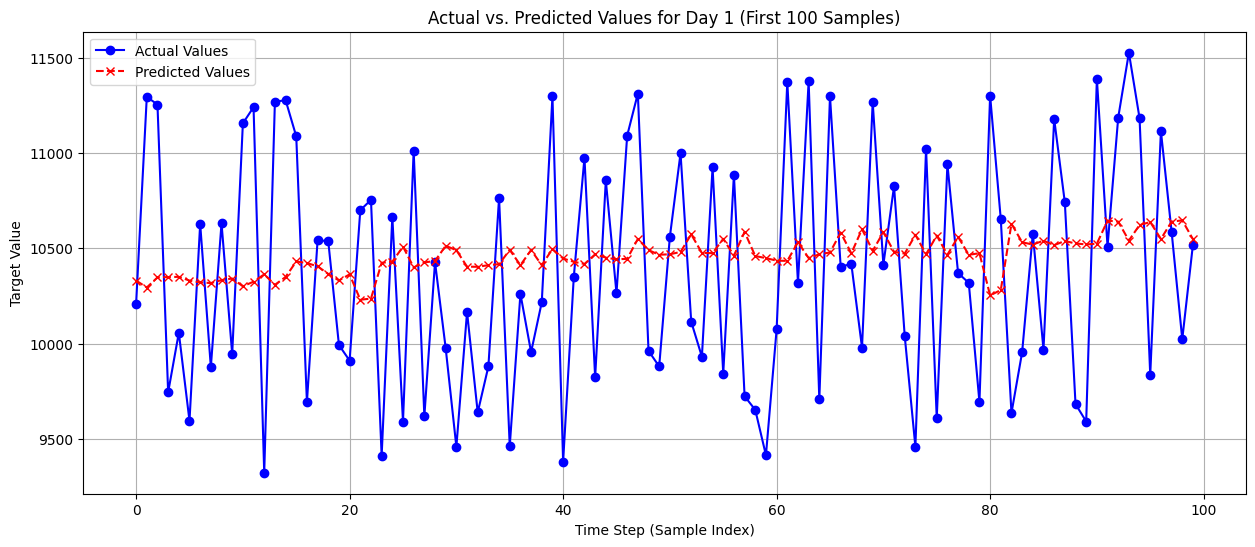

In [62]:
# --- Main Execution ---

# 1. Get predictions on the validation set
y_val_pred = predict_on_validation(xgb_models, X_val)

# 2. Calculate and print performance metrics
evaluate_performance(y_val, y_val_pred)

# 3. Visualize the results for the first day (Day 1)
# You can change day_to_plot to see other days (e.g., day_to_plot=6 for Day 7)
plot_predictions(y_val, y_val_pred, day_to_plot=0, num_samples=100)

In [ ]:
# Build ensemble model
# models = self.build_ensemble_model(X_train, y_train, X_val, y_val)

# Make predictions on validation set
# ensemble_pred, individual_preds = self.predict_ensemble(X_val)

# Evaluate
# metrics = self.evaluate_model(y_val, ensemble_pred)


In [63]:
print("Building LSTM model...")

# Reshape data for LSTM (samples, timesteps, features)
# For simplicity, we'll use the current approach but you can modify for sequence

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(7)  # 7 outputs for 7-day prediction
])

Building LSTM model...


In [68]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

In [70]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=512,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/5
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 36193972.0000 - mae: 3030.6514 - val_loss: 280830976.0000 - val_mae: 9692.1631
Epoch 2/5
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 36618916.0000 - mae: 3045.5415 - val_loss: 239098896.0000 - val_mae: 9134.4961
Epoch 3/5
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 36517880.0000 - mae: 3038.5171 - val_loss: 229782096.0000 - val_mae: 8874.6318
Epoch 4/5
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 36731300.0000 - mae: 3049.1724 - val_loss: 218656464.0000 - val_mae: 8356.5010
Epoch 5/5
1521/1521 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 36657828.0000 - mae: 3039.4812 - val_loss: 250168272.0000 - val_mae: 8906.1562


In [40]:
















    def build_ensemble_model(self, X_train, y_train, X_val, y_val):
        """
        Build ensemble of multiple models
        """
        print("Building ensemble model...")

        # XGBoost models
        xgb_models = self.build_xgboost_model(X_train, y_train, X_val, y_val)

        # LSTM model
        lstm_model = self.build_lstm_model(X_train, y_train, X_val, y_val)

        # Random Forest
        rf_models = []
        for i in range(7):
            rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
            rf.fit(X_train, y_train[:, i])
            rf_models.append(rf)

        self.models = {
            'xgboost': xgb_models,
            'lstm': lstm_model,
            'random_forest': rf_models
        }

        return self.models

    def predict_ensemble(self, X):
        """
        Make ensemble predictions
        """
        predictions = {}

        # XGBoost predictions
        xgb_preds = np.array([model.predict(X) for model in self.models['xgboost']]).T
        predictions['xgboost'] = xgb_preds

        # LSTM predictions
        lstm_preds = self.models['lstm'].predict(X)
        predictions['lstm'] = lstm_preds

        # Random Forest predictions
        rf_preds = np.array([model.predict(X) for model in self.models['random_forest']]).T
        predictions['random_forest'] = rf_preds

        # Ensemble (weighted average)
        ensemble_pred = (0.4 * xgb_preds + 0.3 * lstm_preds + 0.3 * rf_preds)

        return ensemble_pred, predictions

    def evaluate_model(self, y__true, y_pred):
        """
        Evaluate model performance
        """
        metrics = {}

        for i in range(7):
            day = i + 1
            mae = mean_absolute_error(y_true[:, i], y_pred[:, i])
            rmse = np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i]))
            mape = mean_absolute_percentage_error(y_true[:, i], y_pred[:, i])

            metrics[f'day_{day}'] = {
                'MAE': mae,
                'RMSE': rmse,
                'MAPE': mape
            }

        return metrics

    def plot_predictions(self, y_true, y_pred, sample_size=100):
        """
        Plot prediction results
        """
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        axes = axes.flatten()

        for i in range(7):
            ax = axes[i]
            sample_indices = np.random.choice(len(y_true), min(sample_size, len(y_true)), replace=False)

            ax.scatter(y_true[sample_indices, i], y_pred[sample_indices, i], alpha=0.6)
            ax.plot([y_true[:, i].min(), y_true[:, i].max()],
                   [y_true[:, i].min(), y_true[:, i].max()], 'r--', lw=2)
            ax.set_xlabel('Actual Price')
            ax.set_ylabel('Predicted Price')
            ax.set_title(f'Day {i+1} Predictions')

        # Remove the extra subplot
        fig.delaxes(axes[7])
        plt.tight_layout()
        plt.show()

    def train_model(self, df):
        """
        Main training pipeline
        """
        print("Starting model training pipeline...")

        # Preprocess data
        df = self.load_and_preprocess_data(df)

        # Feature engineering
        df = self.create_advanced_features(df)

        # Create targets
        df = self.create_target_variables(df)

        # Prepare model data
        X, y, df_processed = self.prepare_model_data(df)

        # Time-based split
        split_date = df_processed['date'].quantile(0.8)
        train_mask = df_processed['date'] <= split_date

        X_train, X_val = X[train_mask], X[~train_mask]
        y_train, y_val = y[train_mask], y[~train_mask]

        print(f"Training samples: {len(X_train)}")
        print(f"Validation samples: {len(X_val)}")

        # Build ensemble model
        models = self.build_ensemble_model(X_train, y_train, X_val, y_val)

        # Make predictions on validation set
        ensemble_pred, individual_preds = self.predict_ensemble(X_val)

        # Evaluate
        metrics = self.evaluate_model(y_val, ensemble_pred)

        print("\nModel Performance (Ensemble):")
        for day, metric in metrics.items():
            print(f"{day}: MAE={metric['MAE']:.2f}, RMSE={metric['RMSE']:.2f}, MAPE={metric['MAPE']:.3f}")

        # Plot results
        self.plot_predictions(y_val, ensemble_pred)

        return models, metrics

    def predict_future_prices(self, product_data, days=7):
        """
        Predict future prices for a specific product
        """
        # This would need the same preprocessing pipeline
        # For now, return placeholder
        print(f"Predicting prices for next {days} days...")
        return np.random.rand(days) * 1000  # Placeholder

In [41]:
df = all_products

# Make sure columns match: Title, brand, category, date, price
forecaster = PriceForecastingModel()
models, metrics = forecaster.train_model(df)

Starting model training pipeline...
Loading and preprocessing data...
Creating advanced features...
Creating target variables...
Preparing model data...
Training samples: 778400
Validation samples: 194355
Building ensemble model...
Training XGBoost model...
Training XGBoost for day 1...
Training XGBoost for day 2...
Training XGBoost for day 3...
Training XGBoost for day 4...
Training XGBoost for day 5...
Training XGBoost for day 6...
Training XGBoost for day 7...
Building LSTM model...


KeyboardInterrupt: 